<a href="https://colab.research.google.com/github/avawolsborn/Ava-Wolsborn-DS1002/blob/main/Udani_Wolsborn_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [46]:
# List group members (if applicable). Identify names and computing IDs
#
# Ava Wolsborn                    xqc6wc
# Tara Udani                      hav7tz

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [47]:
import pandas as pd

FTXstock = pd.read_csv('/content/ftx-2021-01-01--2023-12-31.csv')
FTXstock

,timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0,"2022-12-31T00:00:00.000Z;""2022-12-31T23:59:59...."
1,"2022-12-30T00:00:00.000Z;""2022-12-30T23:59:59...."
2,"2022-12-29T00:00:00.000Z;""2022-12-29T23:59:59...."
3,"2022-12-28T00:00:00.000Z;""2022-12-28T23:59:59...."
4,"2022-12-27T00:00:00.000Z;""2022-12-27T23:59:59...."
...,...
736,"2021-01-06T00:00:00.000Z;""2021-01-06T23:59:59...."
737,"2021-01-05T00:00:00.000Z;""2021-01-05T23:59:59...."
738,"2021-01-04T00:00:00.000Z;""2021-01-04T23:59:59...."
739,"2021-01-03T00:00:00.000Z;""2021-01-03T23:59:59...."


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [48]:
FTXstock.shape

#There are 741 rows and 1 column

(741, 1)

## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [49]:
FTXstock.duplicated().sum()

14

In [50]:
# because there are 14 duplicate rows, we will drop them (in addition to empty values)

FTXstock = FTXstock.drop_duplicates()
FTXstock = FTXstock.dropna()

FTXstock

,timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0,"2022-12-31T00:00:00.000Z;""2022-12-31T23:59:59...."
1,"2022-12-30T00:00:00.000Z;""2022-12-30T23:59:59...."
2,"2022-12-29T00:00:00.000Z;""2022-12-29T23:59:59...."
3,"2022-12-28T00:00:00.000Z;""2022-12-28T23:59:59...."
4,"2022-12-27T00:00:00.000Z;""2022-12-27T23:59:59...."
...,...
735,"2021-01-07T00:00:00.000Z;""2021-01-07T23:59:59...."
736,"2021-01-06T00:00:00.000Z;""2021-01-06T23:59:59...."
737,"2021-01-05T00:00:00.000Z;""2021-01-05T23:59:59...."
738,"2021-01-04T00:00:00.000Z;""2021-01-04T23:59:59...."


In [51]:
# Since there was only 1 column but several pieces of data stored in that column, we have split the data by semicolons
# and renamed each new index with the original data that was held

FTXstock = FTXstock['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand = True)
FTXstock = FTXstock.rename(columns = {0 : "timeOpen", 1 : "timeClose", 2 : "timeHigh", 3 : "timeLow", 4 : "open", 5 : "high", 6 : "low", 7 : "close", 8 : "volume", 9 : "marketCap", 10 : "timestamp"})
FTXstock

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,"""2022-12-31T23:59:59.999Z""","""2022-12-31T15:23:00.000Z""","""2022-12-31T00:21:00.000Z""",0.8389684425,0.853501666,0.8352262088,0.8426884241,3001502.06,277156103.89,"""2022-12-31T23:59:59.999Z"""
1,2022-12-30T00:00:00.000Z,"""2022-12-30T23:59:59.999Z""","""2022-12-30T04:22:00.000Z""","""2022-12-30T15:12:00.000Z""",0.860193073,0.864751879,0.8266428992,0.8390481756,3608615.07,275958843.95,"""2022-12-30T23:59:59.999Z"""
2,2022-12-29T00:00:00.000Z,"""2022-12-29T23:59:59.999Z""","""2022-12-29T00:49:00.000Z""","""2022-12-29T21:03:00.000Z""",0.8857226476,0.8871175386,0.8430286751,0.8602311608,3766979.57,282925824.23,"""2022-12-29T23:59:59.999Z"""
3,2022-12-28T00:00:00.000Z,"""2022-12-28T23:59:59.999Z""","""2022-12-28T00:20:00.000Z""","""2022-12-28T10:44:00.000Z""",0.9211619958,0.9257015248,0.8698420242,0.8860908765,4192949.85,291430958.35,"""2022-12-28T23:59:59.999Z"""
4,2022-12-27T00:00:00.000Z,"""2022-12-27T23:59:59.999Z""","""2022-12-27T14:19:00.000Z""","""2022-12-27T19:12:00.000Z""",0.9311378574,0.9554017418,0.9164143458,0.9236676658,4574953.05,303789780.67,"""2022-12-27T23:59:59.999Z"""
...,...,...,...,...,...,...,...,...,...,...,...
735,2021-01-07T00:00:00.000Z,"""2021-01-07T23:59:59.999Z""","""2021-01-07T17:59:03.000Z""","""2021-01-07T08:25:03.000Z""",9.386493,10.00487172,9.21524402,9.56213089,46303336.73,902157957.2092104,"""2021-01-07T23:59:59.999Z"""
736,2021-01-06T00:00:00.000Z,"""2021-01-06T23:59:59.999Z""","""2021-01-06T23:59:03.000Z""","""2021-01-06T01:41:03.000Z""",8.67128533,9.39079731,8.4259458,9.39079731,31404627.93,885993155.0438621,"""2021-01-06T23:59:59.999Z"""
737,2021-01-05T00:00:00.000Z,"""2021-01-05T23:59:59.999Z""","""2021-01-05T22:44:03.000Z""","""2021-01-05T06:19:03.000Z""",7.52821638,8.71494656,7.08112034,8.66468773,49479278.39,817486925.3006493,"""2021-01-05T23:59:59.999Z"""
738,2021-01-04T00:00:00.000Z,"""2021-01-04T23:59:59.999Z""","""2021-01-04T06:40:03.000Z""","""2021-01-04T10:18:03.000Z""",6.94867983,7.63214646,6.35821845,7.51407925,40526109.15,708930515.5239879,"""2021-01-04T23:59:59.999Z"""


In [52]:
# Finally, the appropriate columns are deleted

FTXstock = FTXstock.drop(columns = {'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'})
FTXstock

,open,high,low,close,volume,timestamp
0,0.8389684425,0.853501666,0.8352262088,0.8426884241,3001502.06,"""2022-12-31T23:59:59.999Z"""
1,0.860193073,0.864751879,0.8266428992,0.8390481756,3608615.07,"""2022-12-30T23:59:59.999Z"""
2,0.8857226476,0.8871175386,0.8430286751,0.8602311608,3766979.57,"""2022-12-29T23:59:59.999Z"""
3,0.9211619958,0.9257015248,0.8698420242,0.8860908765,4192949.85,"""2022-12-28T23:59:59.999Z"""
4,0.9311378574,0.9554017418,0.9164143458,0.9236676658,4574953.05,"""2022-12-27T23:59:59.999Z"""
...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.56213089,46303336.73,"""2021-01-07T23:59:59.999Z"""
736,8.67128533,9.39079731,8.4259458,9.39079731,31404627.93,"""2021-01-06T23:59:59.999Z"""
737,7.52821638,8.71494656,7.08112034,8.66468773,49479278.39,"""2021-01-05T23:59:59.999Z"""
738,6.94867983,7.63214646,6.35821845,7.51407925,40526109.15,"""2021-01-04T23:59:59.999Z"""


Now display the first 10 rows of the cleaned dataset.

In [53]:
FTXstock.head(10)

,open,high,low,close,volume,timestamp
0,0.8389684425,0.853501666,0.8352262088,0.8426884241,3001502.06,"""2022-12-31T23:59:59.999Z"""
1,0.860193073,0.864751879,0.8266428992,0.8390481756,3608615.07,"""2022-12-30T23:59:59.999Z"""
2,0.8857226476,0.8871175386,0.8430286751,0.8602311608,3766979.57,"""2022-12-29T23:59:59.999Z"""
3,0.9211619958,0.9257015248,0.8698420242,0.8860908765,4192949.85,"""2022-12-28T23:59:59.999Z"""
4,0.9311378574,0.9554017418,0.9164143458,0.9236676658,4574953.05,"""2022-12-27T23:59:59.999Z"""
5,0.8945671492,1.0111825828,0.8936523976,0.9306958402,7065306.21,"""2022-12-26T23:59:59.999Z"""
6,0.9244321852,0.9355165843,0.8943699316,0.894656646,2577834.83,"""2022-12-25T23:59:59.999Z"""
7,0.9575050529,0.9756714327,0.9210848028,0.9244326068,5055004.16,"""2022-12-24T23:59:59.999Z"""
8,1.0271327165,1.0382822479,0.948058351,0.9570063953,17088962.94,"""2022-12-23T23:59:59.999Z"""
9,0.8739733875,1.1271983252,0.8356250943,1.0271616025,22418556.51,"""2022-12-22T23:59:59.999Z"""


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [54]:
# in order to find the difference between each row, the numbers needed to be cast as floats
FTXstock['close'] = FTXstock['close'].astype(float)

# then the difference between each row could be found with the diff() function
FTXstock['close_change'] = FTXstock['close'].diff()
FTXstock

,open,high,low,close,volume,timestamp,close_change
0,0.8389684425,0.853501666,0.8352262088,0.842688,3001502.06,"""2022-12-31T23:59:59.999Z""",NaN
1,0.860193073,0.864751879,0.8266428992,0.839048,3608615.07,"""2022-12-30T23:59:59.999Z""",-0.003640
2,0.8857226476,0.8871175386,0.8430286751,0.860231,3766979.57,"""2022-12-29T23:59:59.999Z""",0.021183
3,0.9211619958,0.9257015248,0.8698420242,0.886091,4192949.85,"""2022-12-28T23:59:59.999Z""",0.025860
4,0.9311378574,0.9554017418,0.9164143458,0.923668,4574953.05,"""2022-12-27T23:59:59.999Z""",0.037577
...,...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.181143
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",-0.171334
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",-0.726110
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",-1.150608


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [55]:
# the change column was sorted from increasing to decreasing (indicated by ascending = False)
FTXgrowth = FTXstock.sort_values('close_change', ascending = False)

# the first row displayed a value of NaN, so it was dropped
FTXgrowth = FTXgrowth.dropna()

# finally, the top 10 days were pulled and any distracting columns from the necessary information were deleted
FTXgrowth = FTXgrowth.head(10)
FTXgrowth = FTXgrowth.drop(columns = {'open', 'high', 'low', 'close', 'volume'})
FTXgrowth

,timestamp,close_change
56,"""2022-11-07T23:59:59.999Z""",16.623292
468,"""2021-09-16T23:59:59.999Z""",14.497738
598,"""2021-05-18T23:59:59.999Z""",14.017812
478,"""2021-09-15T23:59:59.999Z""",9.506381
473,"""2021-09-19T23:59:59.999Z""",8.315742
484,"""2021-09-09T23:59:59.999Z""",6.929033
350,"""2022-01-20T23:59:59.999Z""",6.770635
594,"""2021-05-22T23:59:59.999Z""",6.228516
481,"""2021-09-12T23:59:59.999Z""",5.201864
605,"""2021-05-11T23:59:59.999Z""",5.154806


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [56]:
# the pctchange() function allowed us to create a new column in just one line:
FTXstock['rate_of_change'] = FTXstock['close_change'].pct_change()
FTXstock

,open,high,low,close,volume,timestamp,close_change,rate_of_change
0,0.8389684425,0.853501666,0.8352262088,0.842688,3001502.06,"""2022-12-31T23:59:59.999Z""",NaN,NaN
1,0.860193073,0.864751879,0.8266428992,0.839048,3608615.07,"""2022-12-30T23:59:59.999Z""",-0.003640,NaN
2,0.8857226476,0.8871175386,0.8430286751,0.860231,3766979.57,"""2022-12-29T23:59:59.999Z""",0.021183,-6.819104
3,0.9211619958,0.9257015248,0.8698420242,0.886091,4192949.85,"""2022-12-28T23:59:59.999Z""",0.025860,0.220778
4,0.9311378574,0.9554017418,0.9164143458,0.923668,4574953.05,"""2022-12-27T23:59:59.999Z""",0.037577,0.453101
...,...,...,...,...,...,...,...,...
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.181143,-1.955785
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",-0.171334,-1.945849
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",-0.726110,3.237988
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",-1.150608,0.584621


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [57]:
# as done in no. 5, the column of percent change was ordered greatest to least + the NaN values and distracting columns were dropped
FTX_percentchange = FTXstock.sort_values('rate_of_change', ascending = False)
FTX_percentchange = FTX_percentchange.dropna()
FTX_percentchange = FTX_percentchange.drop(columns = {'open', 'high', 'low', 'close', 'volume'})

# the top 5 and bottom 5 were identified using the head and tail functions.
FTX_toppercentchange = FTX_percentchange.head(5)
FTX_bottompercentchange = FTX_percentchange.tail(5)

# these two data frames were then combined to create one table of greatest positive and negative rate change
FTX_percentchange = pd.concat([FTX_toppercentchange, FTX_bottompercentchange], axis = 0)
FTX_percentchange

,timestamp,close_change,rate_of_change
110,"""2022-09-14T23:59:59.999Z""",1.435608,273.028254
516,"""2021-08-08T23:59:59.999Z""",-5.325192,216.674634
182,"""2022-07-06T23:59:59.999Z""",-1.193918,178.229185
369,"""2021-12-31T23:59:59.999Z""",-1.890430,97.180950
216,"""2022-06-02T23:59:59.999Z""",1.144636,58.778546
306,"""2022-03-05T23:59:59.999Z""",1.340660,-79.028500
193,"""2022-06-25T23:59:59.999Z""",0.773428,-83.605800
446,"""2021-10-15T23:59:59.999Z""",0.577762,-166.691725
240,"""2022-05-10T23:59:59.999Z""",3.418631,-370.048919
135,"""2022-08-20T23:59:59.999Z""",-0.987930,-1146.635171


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

In [58]:
import matplotlib.pyplot as plt

<Axes: xlabel='timestamp'>

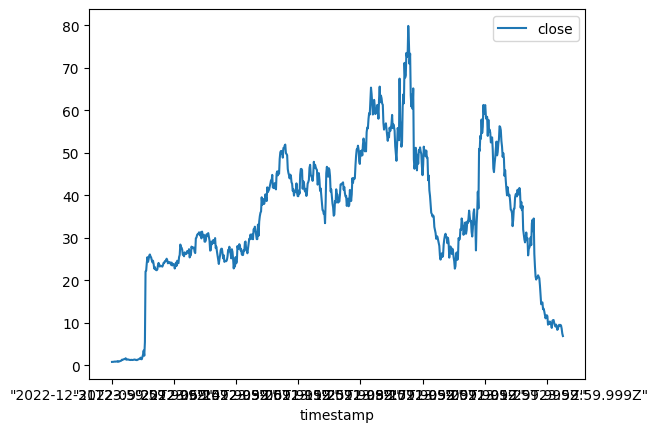

In [59]:
FTXstock.plot('timestamp' , 'close')

<Axes: xlabel='timestamp'>

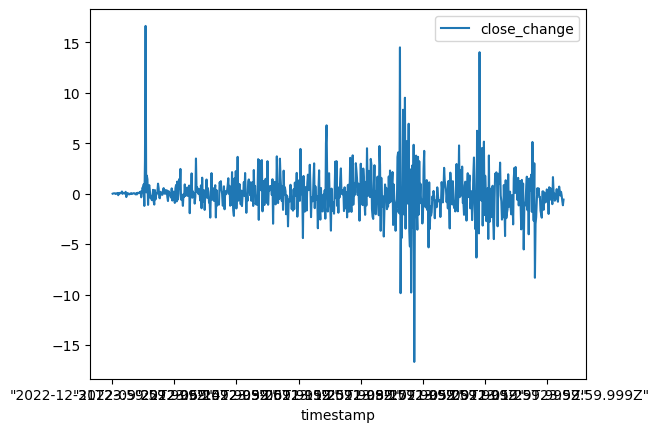

In [60]:
FTXstock.plot('timestamp', 'close_change')

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

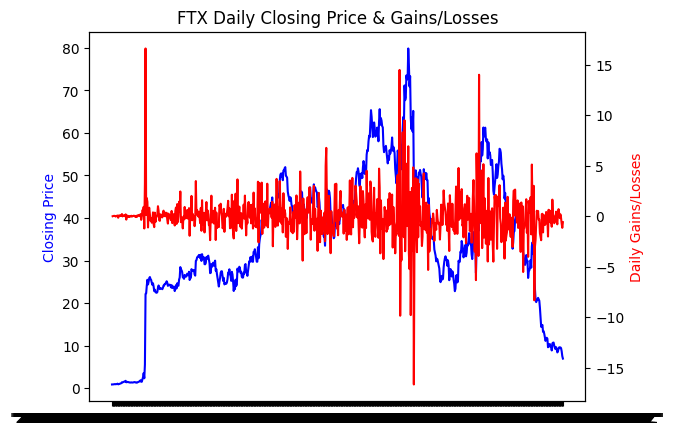

In [45]:
fig, ax1 = plt.subplots()

# this plots the closing price on the first y-axis (on the left)
ax1.plot(FTXstock['timestamp'], FTXstock['close'], color='blue')
ax1.set_ylabel('Closing Price', color='blue')

# this creates a second, y-axis for the daily gains/losses (on the right) that shares (twins) the x axis
ax2 = ax1.twinx()
ax2.plot(FTXstock['timestamp'], FTXstock['close_change'], color='red')
ax2.set_ylabel('Daily Gains/Losses', color='red')

# adding a title and x axis label
plt.xlabel('Date')
plt.title('FTX Daily Closing Price & Gains/Losses')
plt.show()
